# Analiza podatkov evrolige

In [1]:
import pandas as pd

# samo 20 vrstic tabele hočem da izpiše
pd.options.display.max_rows = 20

# orodje za risanje grafov
%matplotlib inline

# tabele

trenerji = pd.read_csv('podatki\\trenerji.csv', index_col='klub')
igralci = pd.read_csv('podatki\\igralci.csv', index_col='klub')
statistika = pd.read_csv('podatki\\statistika-ekip.csv')
tekme = pd.read_csv('podatki\\tekme.csv', index_col = 'klub')

In [2]:
import matplotlib.pyplot as plt

Zanimajo me samo prve štiri ekipe v vsaki sezoni. Zato najprej naredim tabelo v kateri so prve štiri ekipe za vsako sezono.

Za prvi dve sezoni sem naredil na roke, ker je bil drugačen sistem tekmovanja.

In [4]:
barve_klubov = {'PAN': 'green', 'VIR': 'grey', 'BAS': 'darkred', 'FOR': 'indigo', 'TEL': 'yellow', 'AEK': 'gold', 'BAR': 'blue',
        'CSK': 'red', 'MAD': 'purple', 'MAL': 'limegreen', 'OLY': 'orangered', 'ZAL': 'darkgreen', 'PAR': 'black',
        'SIE': 'cyan', 'TIV': 'pink', 'TRE': 'saddlebrown', 'ULK': 'navy'}

In [5]:
def doloci_barvo(tabela, col=barve_klubov):
    klubi = tabela.index.tolist()
    seznam = []
    for klub in klubi:
        seznam.append(col[klub])
    return seznam

In [6]:
razvrstitve = pd.DataFrame()
razvrstitve = razvrstitve.append([('VIR', 2000, 1), ('BAS', 2000, 2), ('FOR', 2000, 3), ('AEK', 2000, 4)])
razvrstitve = razvrstitve.append([('PAN', 2001, 1), ('VIR', 2001, 2), ('TEL', 2001, 3), ('TRE', 2001, 4)])

Ostale sezone z dvojno for zanka prefiltriram.

In [7]:
for sezona in range(2002, 2018):
    #prvi_stirje = {}
    final_four = tekme[(tekme.sezona == sezona) & (tekme.faza == 'Final Four')]
    indeksi = list(dict.fromkeys(final_four.index))
    for indeks in indeksi:
        ekipa = final_four.loc[indeks]
        if len(ekipa[ekipa.zmaga == 'W']) == 2:
            razvrstitve = razvrstitve.append([(indeks, sezona, 1)], ignore_index=True)
        elif len(ekipa[ekipa.zmaga == 'L']) == 2:
            razvrstitve = razvrstitve.append([(indeks, sezona, 4)], ignore_index=True)
        elif len(ekipa[(ekipa.zmaga == 'W') & (ekipa.st_tekme == 2)]) == 0:
            razvrstitve = razvrstitve.append([(indeks, sezona, 2)], ignore_index=True)
        else:
            razvrstitve = razvrstitve.append([(indeks, sezona, 3)], ignore_index=True)

In [8]:
razvrstitve = razvrstitve.rename(columns={0: 'klub', 1:'sezona', 2:'mesto'})
razvrstitve = razvrstitve.set_index('klub')

## Vprašanje: Kateri klubi so najuspešnejši?

[Text(0, 0.5, 'Število nastopov')]

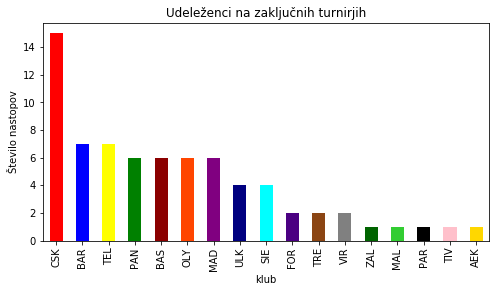

In [43]:
finalisti = razvrstitve.groupby('klub').size().sort_values(ascending=False)
barve = doloci_barvo(finalisti)
finalisti.plot.bar(title='Udeleženci na zaključnih turnirjih', figsize=[8,4],
                         color=barve).set(ylabel='Število nastopov')

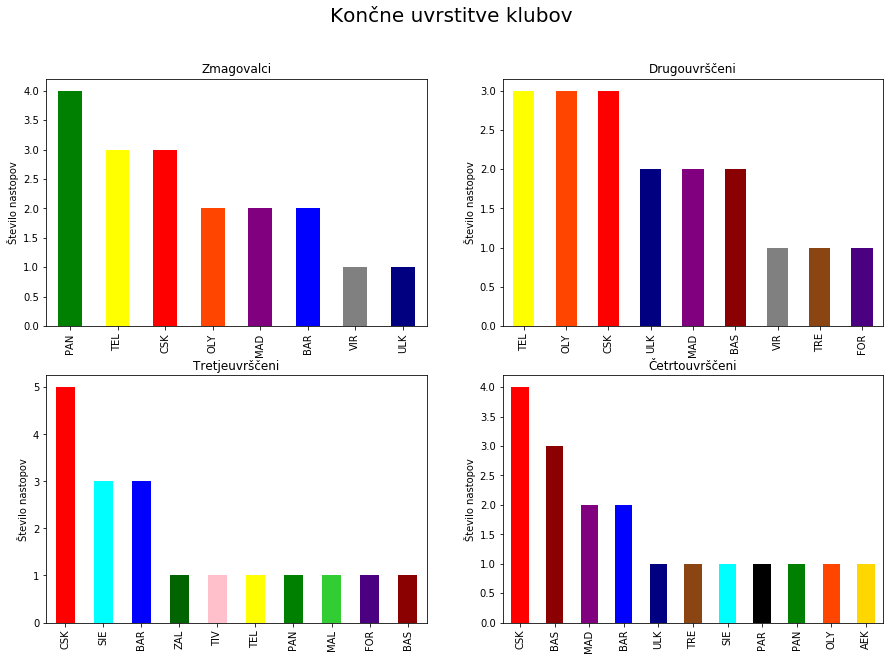

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.suptitle('Končne uvrstitve klubov', fontsize=20)
podgrafi = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
for i in range(1, 5):
    ekipe = razvrstitve[razvrstitve.mesto == i].groupby('klub').size().sort_values(ascending=False)
    barve = doloci_barvo(ekipe)
    ekipe.plot.bar(ax=podgrafi[i-1], color=barve, title = naslovi[i-1]).set(xlabel = None, ylabel='Število nastopov')

V zgornjih tabelah vidimo, da se je največkrat na zaključni turnir uvrstil CSKA Moscow. Največ naslovov pa ima Panathinakos, zgolj enega manj ima CSKA. Tako lahko rečemo, da je najuspešnejša ekipa CSKA Moscow. Prav tako opazimo da je edini klub, ki se je uvrstil na zaključni turnir iz področja bivše jugoslavije beograjski Partizan. Slovenski klubi pa se nažalost še niso uvrstil na zaključni turnir.

## Hipoteza: Najuspešnejši trenerji so srbski trenerji.

In [8]:
najbolsi_trenerji = pd.merge(razvrstitve, trenerji, on=['klub', 'sezona'])

[Text(0, 0.5, 'Število nastopov'), Text(0.5, 0, '')]

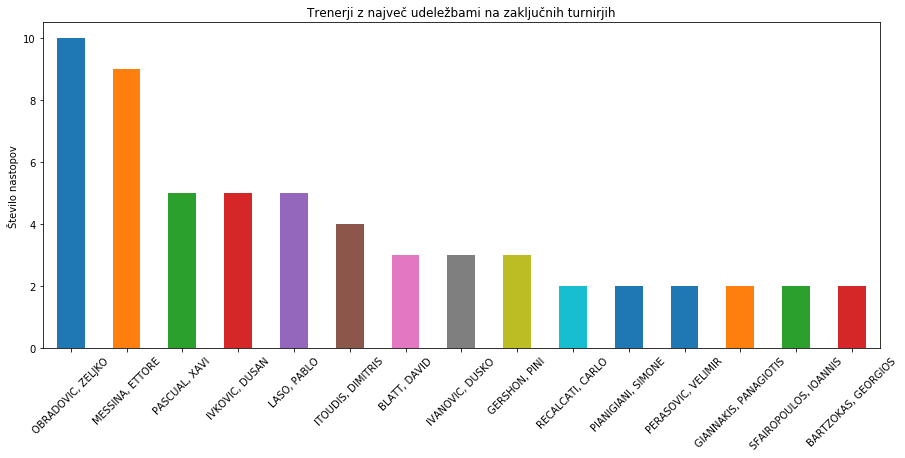

In [45]:
najbolsi_trenerji.groupby('ime').size().sort_values(ascending=False).head(15).plot.bar(
    title='Trenerji z največ udeležbami na zaključnih turnirjih', 
    figsize=[15, 6], rot=45).set(xlabel=None, ylabel='Število nastopov')

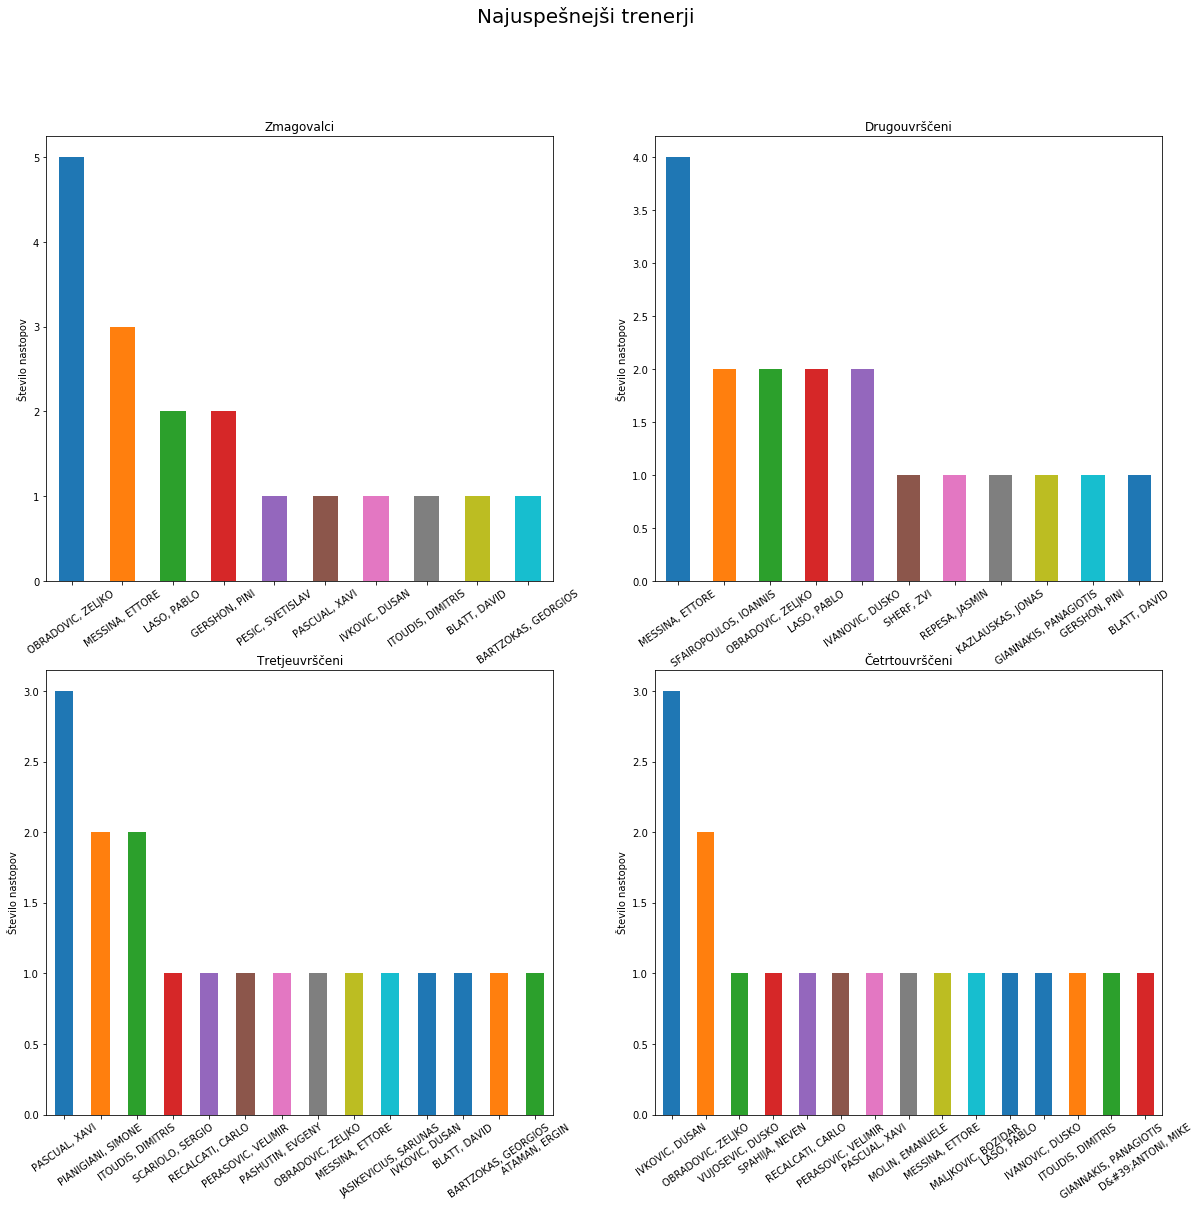

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,18))
fig.suptitle('Najuspešnejši trenerji', fontsize=20)
podgrafi = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
for i in range(1, 5):
    coaches = najbolsi_trenerji[najbolsi_trenerji.mesto == i].groupby('ime').size().sort_values(ascending=False)
    coaches.plot.bar(ax=podgrafi[i-1], title = naslovi[i-1], rot=35).set(xlabel = None, ylabel='Število nastopov')

Zgornji dve tabeli kažeta, da je najbol uspešen trener Željko Obradovič tako po naslovih kot po udeležbah na zaključnih turnirjih.  
Iz tega lahko rečem, da če ima nek klub željo po vrhunskem rezultatu mora zaposliti Željka Obradoviča. Kar je turška ekipa Fenerbahce tudi naredila, kar se ji je obrestovalo z naslovom dve leti nazaj.

In [13]:
barve_drzav = {'Serbia': 'red', 'Italy': 'aqua', 'Spain': 'orangered', 'Greece': 'blue', 'Lithuania': 'green',
               'Germany': 'black', 'Israel': 'gold', 'United States of America': 'navy', 'Croatia': 'maroon', 
              'Montenegro': 'darkorange', 'Turkey': 'darkgrey', 'Russian Federation': 'firebrick'}

[Text(0, 0.5, 'Število udeležb')]

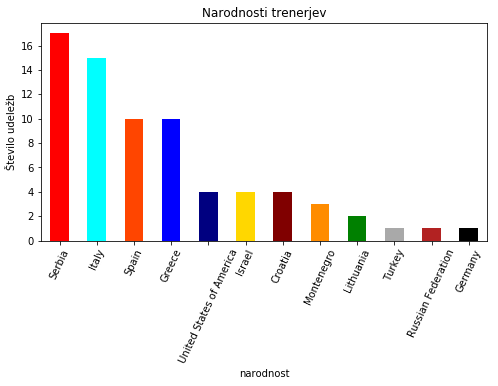

In [14]:
narodnost_trenerjev = najbolsi_trenerji.groupby('narodnost').size().sort_values(ascending=False)
narodnost_trenerjev.plot.bar(title = 'Narodnosti trenerjev', color = doloci_barvo(narodnost_trenerjev, barve_drzav),
                             rot=65, figsize=[8, 4]).set(ylabel='Število udeležb')

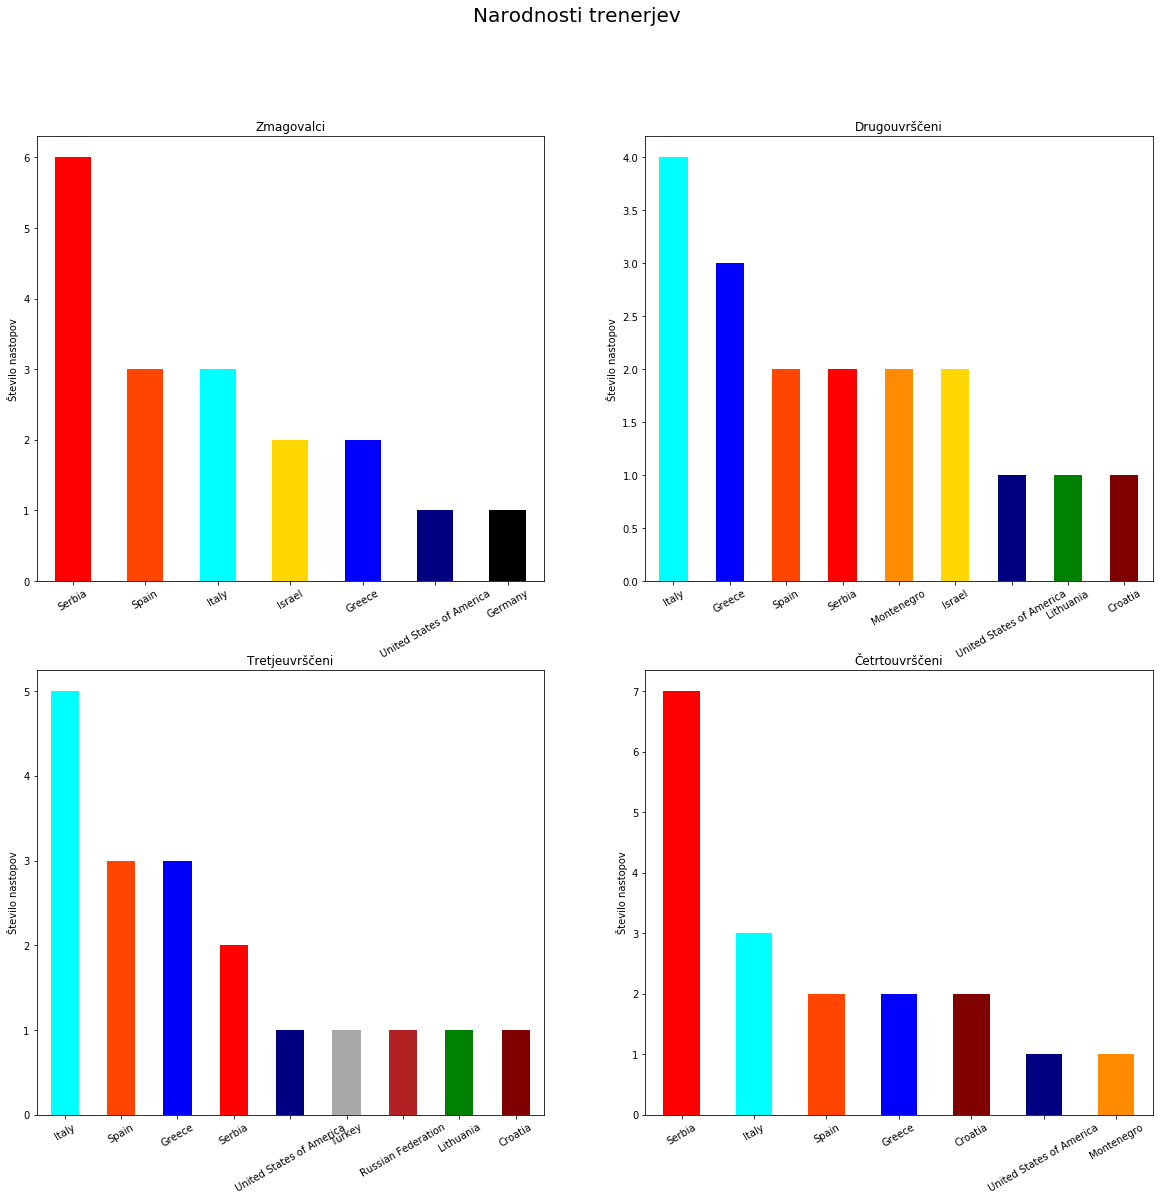

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,18))
fig.suptitle('Narodnosti trenerjev', fontsize=20)
podgrafi = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
for i in range(1, 5):
    coaches = najbolsi_trenerji[najbolsi_trenerji.mesto == i].groupby('narodnost').size().sort_values(ascending=False)
    barve = doloci_barvo(coaches, barve_drzav)
    coaches.plot.bar(ax=podgrafi[i-1], title = naslovi[i-1], color=barve, rot=30).set(xlabel = None, ylabel='Število nastopov')

In [9]:
najbolsi_trenerji[najbolsi_trenerji.narodnost == 'Germany']

,sezona,mesto,ime,funkcija,narodnost,rojstvo
klub,,,,,,
BAR,2002,1,"PESIC, SVETISLAV",Head coach,Germany,1949


Iz zgornjih grafov vidim da so največ lovorik osvojili srbski trenerji, seveda jih je kar 5 od 6 naslovov sovojil Željko Obradovič. Prav tako gre pripomniti da naslov, ki je pripisan Nemčiji, dejansko pripada Svetislavu Pešiču, ki je rojen v Srbiji in ima nemško državljanstvo. Torej bi lahko ta naslov prišteli tudi Srbiji.  
Torej zgornji grafi potrjujejo mojo hipotezo.

## Vprašanje: Kateri igralci so najuspešnejši?
## Hipoteza: Zopet menim da so med uspešnejšimi srbski igralci

In [9]:
igralci['starost'] = igralci['sezona'] - igralci['rojstvo']

In [10]:
najbolsi_igralci = pd.merge(razvrstitve, igralci, on=['klub', 'sezona'])

In [35]:
barve_drzav['France'] = 'purple'
barve_drzav['Slovenia'] = 'lightgreen'
barve_drzav['Argentina'] = 'skyblue'

[Text(0, 0.5, 'Število različnih igralcev')]

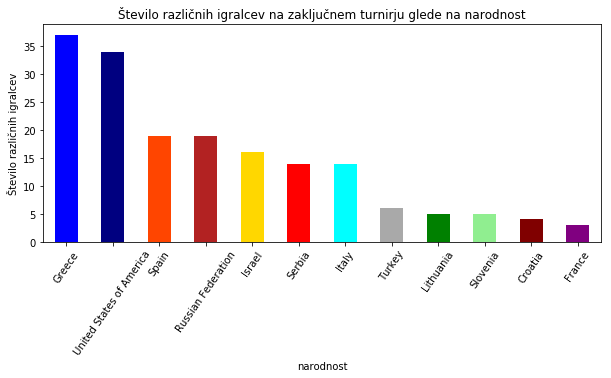

In [48]:
t = najbolsi_igralci[najbolsi_igralci.mesto==1].groupby(
    ['ime','narodnost']).size().groupby('narodnost').size().sort_values(ascending=False).head(12)
t.plot.bar(figsize=[10,4], rot=55, color=doloci_barvo(t, barve_drzav), 
           title='Število različnih igralcev na zaključnem turnirju glede na narodnost').set(ylabel=
                                                                                             'Število različnih igralcev')

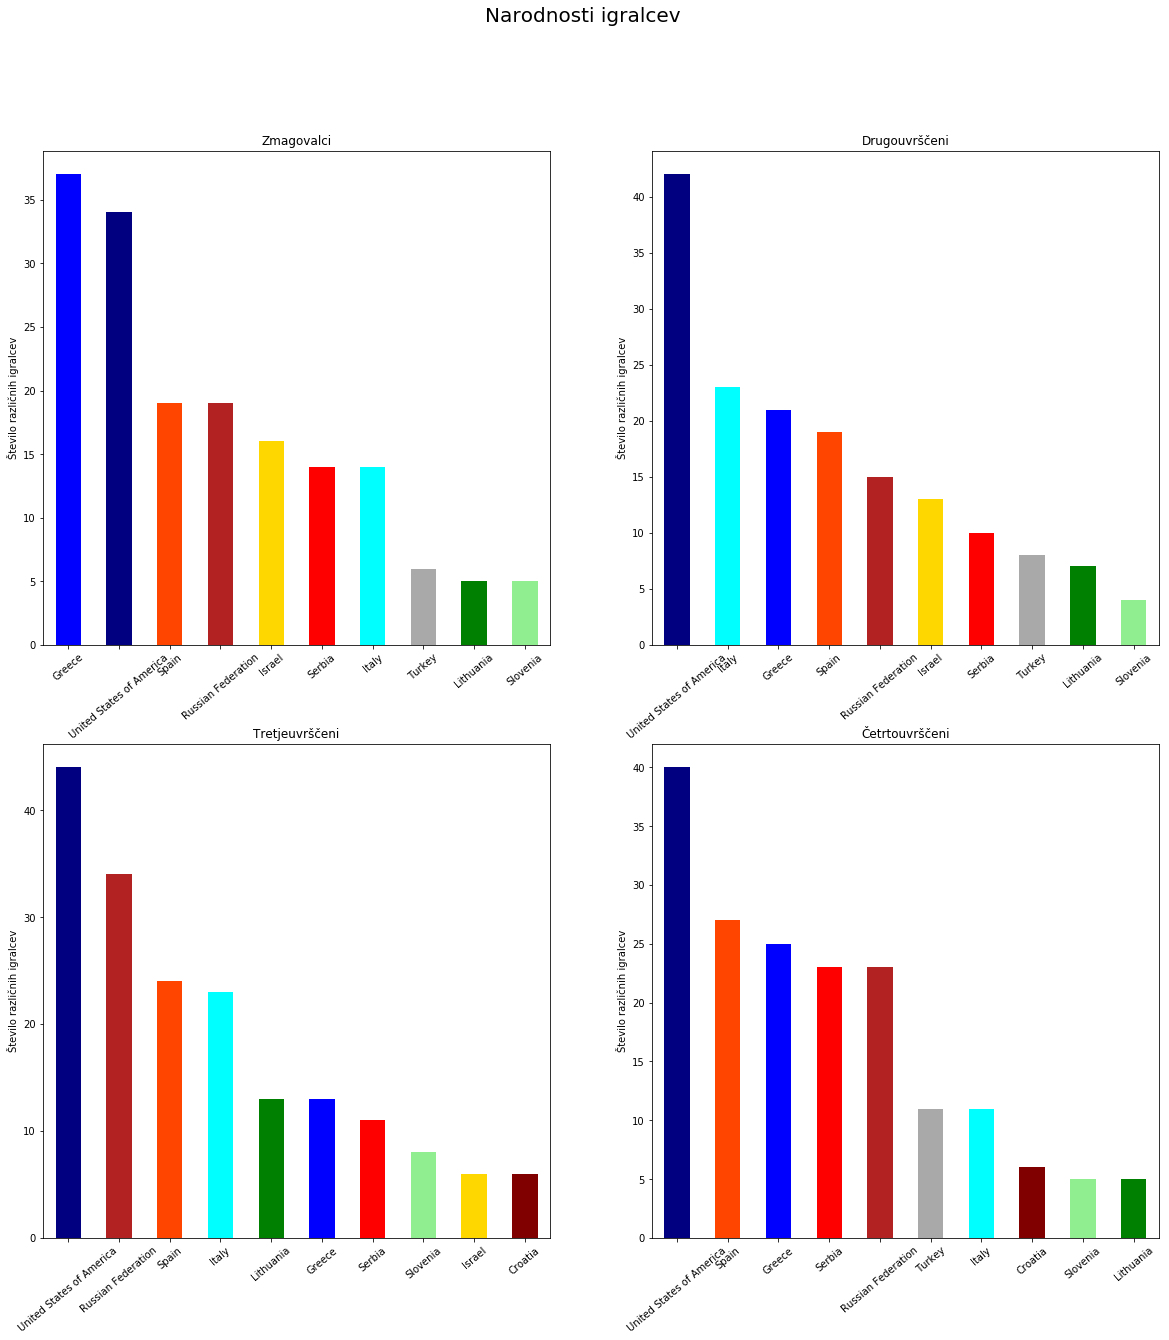

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Narodnosti igralcev', fontsize=20)
podgrafi = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
for i in range(1, 5):
    players = najbolsi_igralci[najbolsi_igralci.mesto == i].groupby(
        ['ime', 'narodnost']).size().groupby('narodnost').size().sort_values(ascending=False).head(10)
    barve = doloci_barvo(players, barve_drzav)
    players.plot.bar(ax=podgrafi[i-1], title = naslovi[i-1], color=barve, rot=40).set(xlabel=None, 
                                                                                      ylabel='Število različnih igralcev')

Iz zgornjih grafov vidim, da igralci z največ lovorikami prihajajo iz Grčije in Amerike. Srbski igralci sicer niso med najuspešnejšimi so pa še vedno med uspešnejšimi, kar potrjuje mojo hipotezo.

Prav tako vidim da imajo slovenski košarkaši kar nekaj nastopov na zaključnih nastopih. Spodaj so prikazani njihova imena in število nastopov na zaključnem turnirju. Kjer sta tudi dva naturalizirana Slovenca in sicer $Kevin$ $Pangos$ in $Ariel$ $Mcdonald$. 

In [168]:
najbolsi_igralci[najbolsi_igralci.narodnost == 'Slovenia'].groupby('ime').size().sort_values(ascending=False)

ime
SMODIS, MATJAZ      8
LORBEK, ERAZEM      6
LAKOVIC, JAKA       3
NACHBAR, BOSTJAN    2
DONCIC, LUKA        2
BEGIC, MIRZA        2
BECIROVIC, SANI     2
UDRIH, BENO         1
TUSEK, MARKO        1
PANGOS, KEVIN       1
McDONALD, ARRIEL    1
BLAZIC, JAKA        1
dtype: int64

## Hipoteza: Ameriški igralci vedno bolj preplavljajo evropkso košarko

Spodnji graf potrjuje mojo hipotezo, iz sezone v sezono je vedno več ameriški igralcev.

[Text(0, 0.5, 'Število različnih igralcev')]

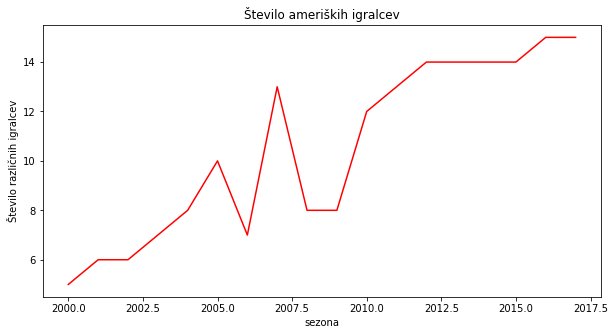

In [166]:
najbolsi_igralci[najbolsi_igralci.narodnost=='United States of America'].groupby(
    ['ime', 'sezona']).size().groupby('sezona').size().plot(title='Število ameriških igralcev', color='red',
                                                            figsize=[10,5]).set(ylabel='Število različnih igralcev')

## Vprašanje: kakšna naj bi bila idelna peterka, glede na število naslovov prvaka?

[Text(0, 0.5, 'Število nastopov')]

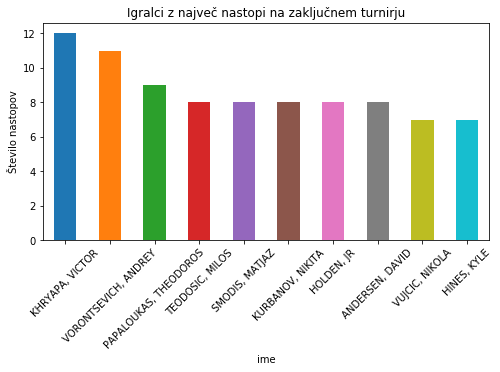

In [99]:
najbolsi_igralci.groupby('ime').size().sort_values(
    ascending=False).head(10).plot.bar(title='Igralci z največ nastopi na zaključnem turnirju', figsize=[8, 4],
                                       rot=45).set(ylabel='Število nastopov')

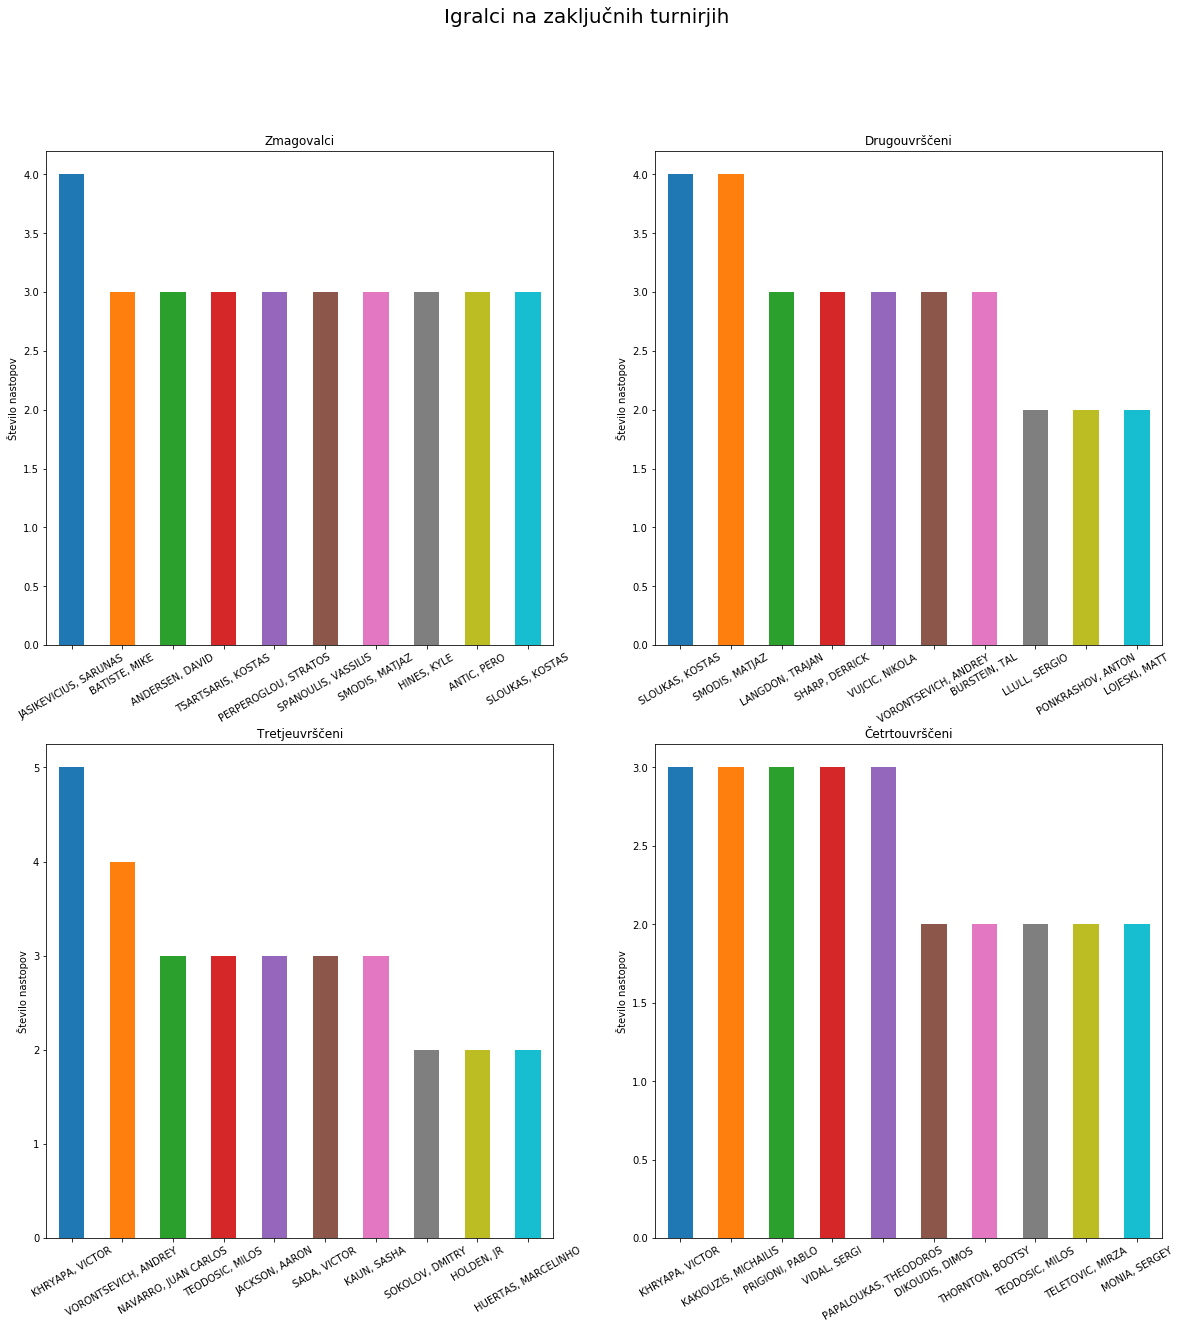

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Igralci na zaključnih turnirjih', fontsize=20)
podgrafi = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
for i in range(1, 5):
    players = najbolsi_igralci[najbolsi_igralci.mesto == i].groupby('ime').size().sort_values(ascending=False).head(10)
    players.plot.bar(ax=podgrafi[i-1], title = naslovi[i-1], rot=30).set(xlabel=None, ylabel='Število nastopov')

### Branilca

In [33]:
najbolsi_igralci[(najbolsi_igralci.mesto==1) & (najbolsi_igralci.pozicija=='Guard')].groupby('ime').size().sort_values(ascending=False).head(2)

ime
JASIKEVICIUS, SARUNAS    4
SPANOULIS, VASSILIS      3
dtype: int64

### Krilna košarkaša

In [35]:
najbolsi_igralci[(najbolsi_igralci.mesto==1) & (najbolsi_igralci.pozicija=='Forward')].groupby('ime').size().sort_values(ascending=False).head(2)

ime
PERPEROGLOU, STRATOS    3
ALVERTIS, FRAGISKOS     3
dtype: int64

### Center

In [36]:
najbolsi_igralci[(najbolsi_igralci.mesto==1) & (najbolsi_igralci.pozicija=='Center')].groupby('ime').size().sort_values(ascending=False).head(1)

ime
ANDERSEN, DAVID    3
dtype: int64

## Hipoteza: Višina centrov v zadnjih sezonah pada

[Text(0, 0.5, 'Višina')]

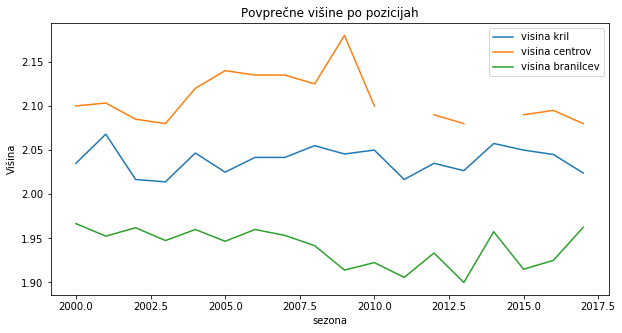

In [29]:
centri = najbolsi_igralci[(najbolsi_igralci.pozicija == 'Center') & (najbolsi_igralci.starost <= 22)].rename(columns={'visina': 'visina centrov'})
krila = najbolsi_igralci[(najbolsi_igralci.pozicija == 'Forward') & (najbolsi_igralci.starost <= 22)].rename(columns={'visina': 'visina kril'})
branilci = najbolsi_igralci[(najbolsi_igralci.pozicija == 'Guard') & (najbolsi_igralci.starost <= 22)].rename(columns={'visina': 'visina branilcev'})
v = pd.merge(krila, branilci, how='outer')
visine = pd.merge(v, centri, how='outer')
visine[['sezona', 'visina kril', 'visina centrov', 
        'visina branilcev']].groupby('sezona').mean().plot(title = 'Povprečne višine po pozicijah', figsize=[10, 5]).set(ylabel='Višina')

Gledam igralce, ki so mlajši od 23 let, kajti hipoteza temelji na mladih igralcih, ki se še uveljavlajo.  
Graf potrjuje mojo hipotezo. Iz grafa še vidim, da hipoteza za branilce in krilne košarkaše ne velja.

## Statistika

In [114]:
stat = statistika.rename(columns={'klub': 'polno ime', 'kratica': 'klub'})
stat.set_index('klub')
stat_najbolsih = pd.merge(razvrstitve, stat, on=['klub', 'sezona'])
stat_najbolsih['povprecje'] = round(stat_najbolsih.podatek / stat_najbolsih.st_tekem, 2) # popravim povprecje ker se je pri pobiranju podatkov zgodila napaka
statistika_doma = stat_najbolsih[stat_najbolsih.kje == 'doma']
statistika_v_gosteh = stat_najbolsih[stat_najbolsih.kje == 'v gosteh']
statistika_doma = statistika_doma.rename(columns={'povprecje': 'povprecje_doma'})
statistika_v_gosteh = statistika_v_gosteh.rename(columns={'povprecje': 'povprecje_v_gosteh'})
stat = pd.merge(statistika_doma, statistika_v_gosteh, how='outer')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


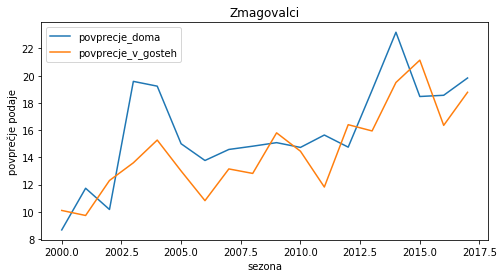

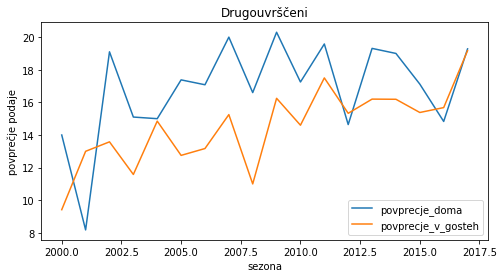

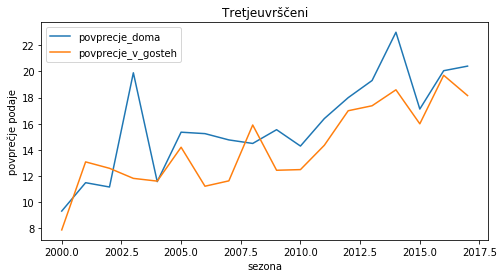

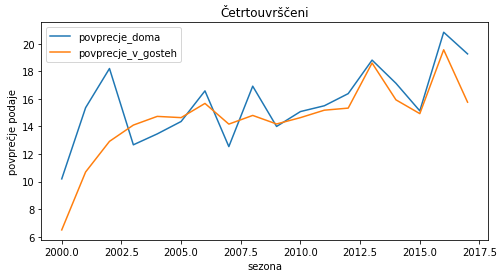

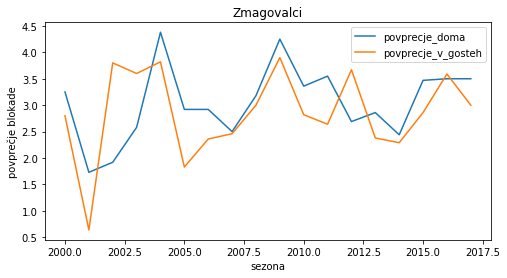

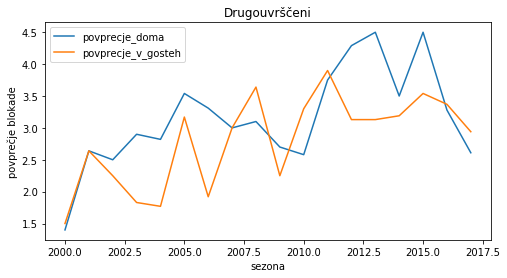

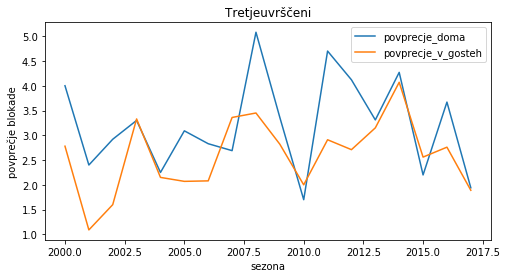

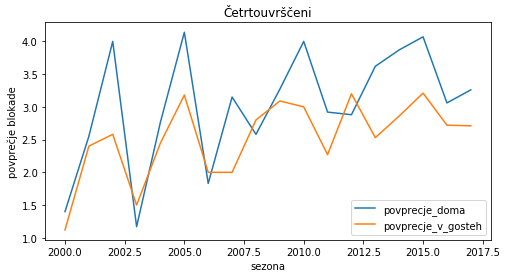

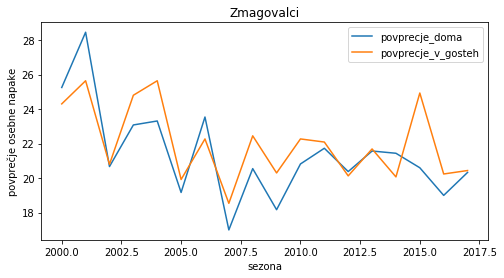

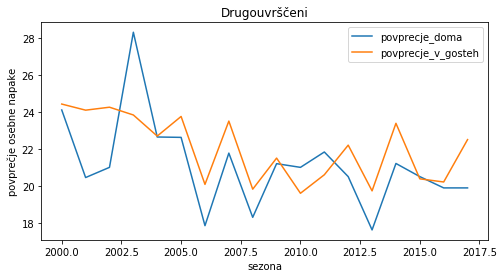

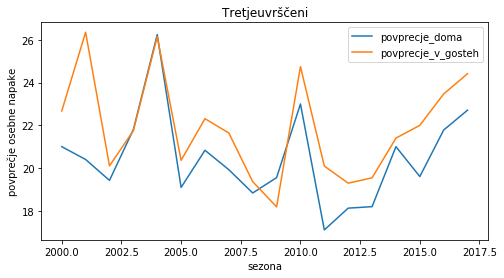

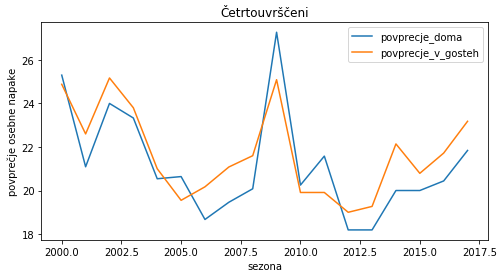

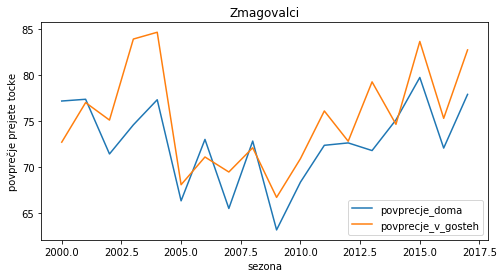

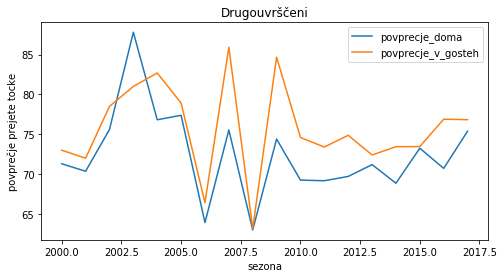

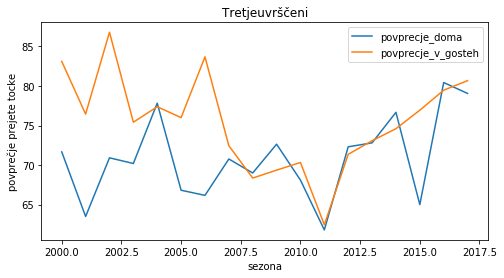

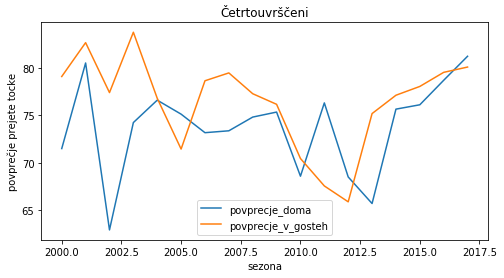

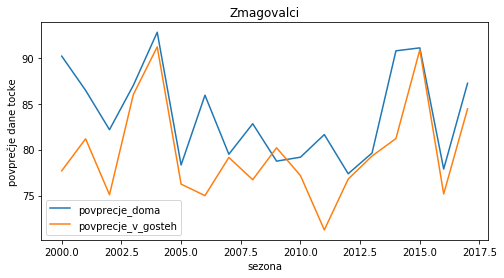

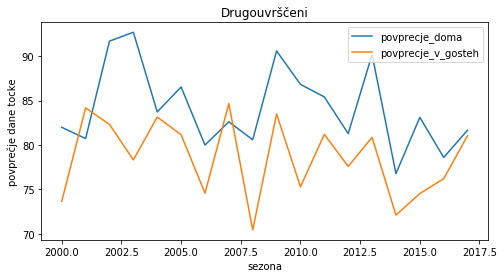

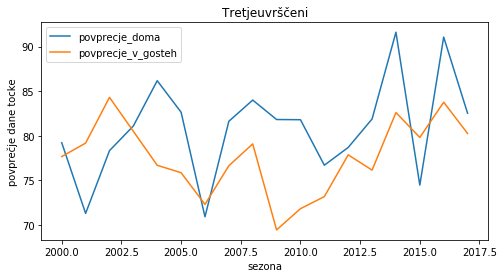

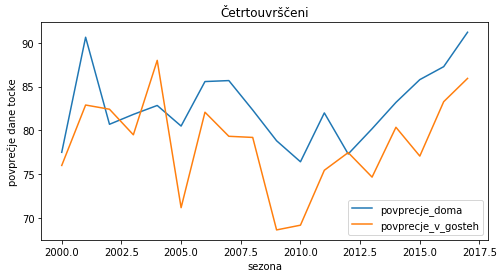

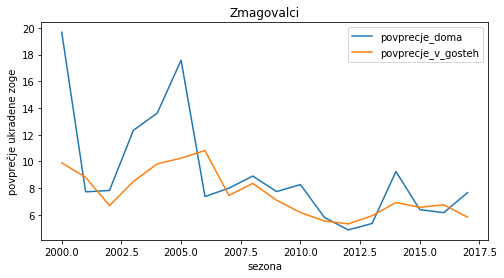

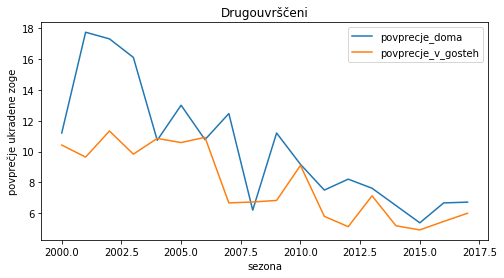

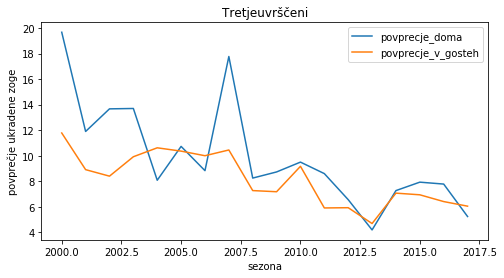

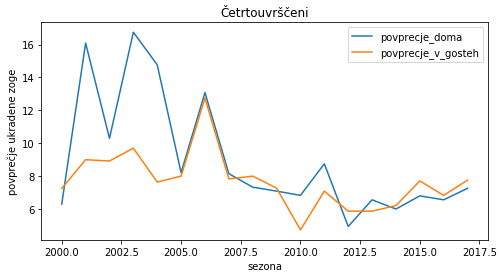

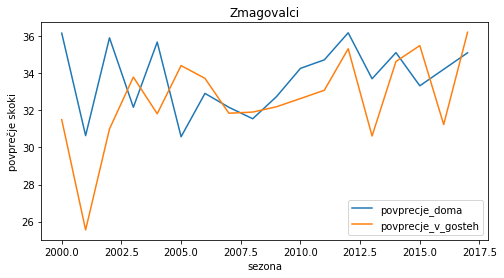

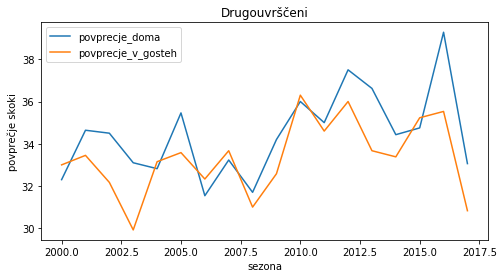

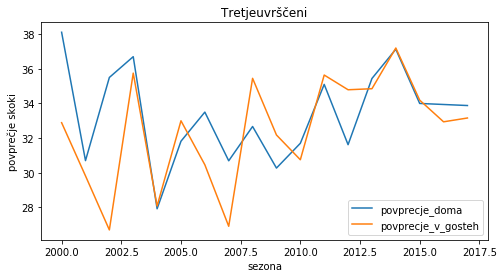

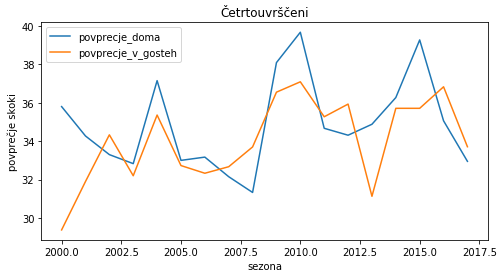

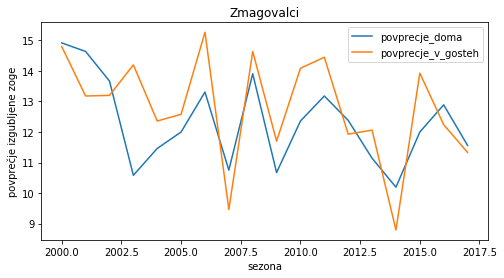

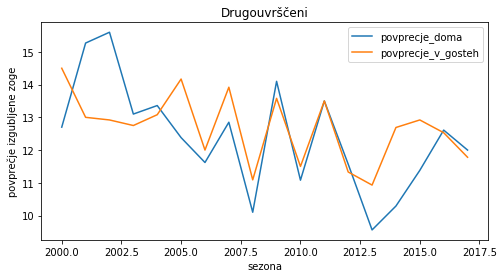

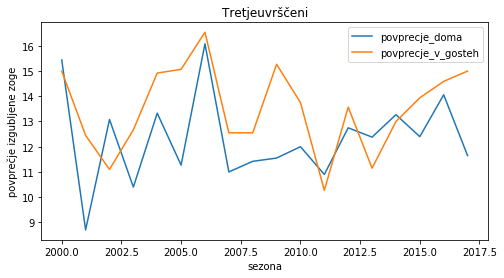

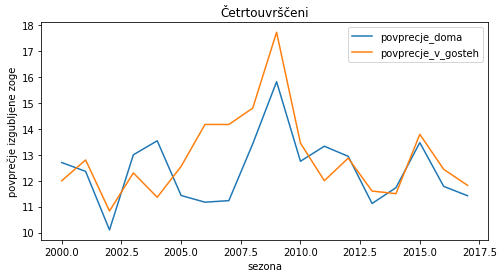

In [123]:
naslovi = ['Zmagovalci', 'Drugouvrščeni', 'Tretjeuvrščeni', 'Četrtouvrščeni']
podatki = list(dict.fromkeys(stat['vrsta_podatka']))
for podatek in podatki:
    for i in range(1, 5):
        podatki = stat[(stat.mesto == i) & 
                       (stat.vrsta_podatka==podatek)][['sezona', 'povprecje_doma', 
                                                       'povprecje_v_gosteh']].groupby('sezona').mean()
        podatki.plot(title=naslovi[i-1], figsize=[8,4]).set(ylabel='povprečje {}'.format(podatek))

Med zmagovalci in ostalimi udeleženci zaključnega turnirja na zgornjih grafih ne vidim bistvenih razlik.
Iz tega lahko rečem, da bistvenih razlik v kakovosti med zmagovalnimi ekipami in poraženci ni. Zmagovalne ekipe so predvsem tiste z več izkušnjami in tudi sreče. 

Spodaj je še predstavljeno kako se je spreminjala statistika klubov na zaključnih turnirjih skozi leta.

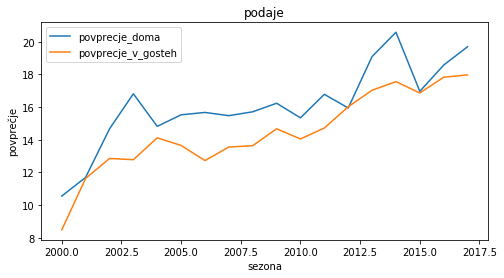

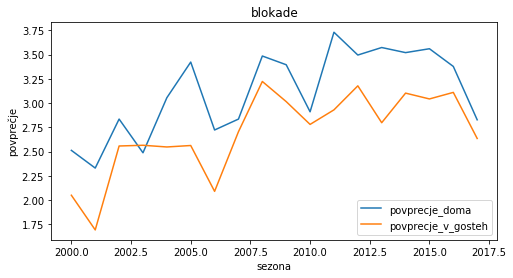

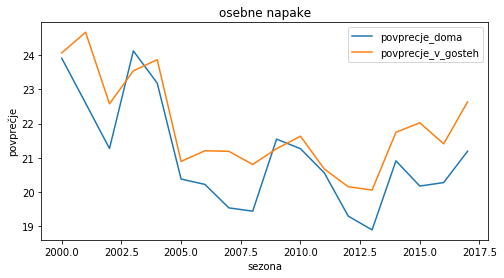

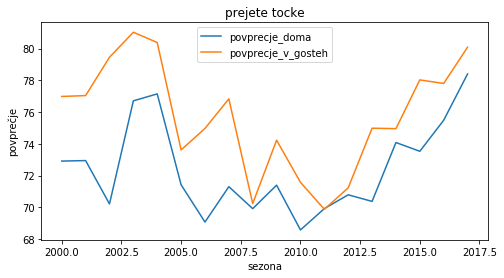

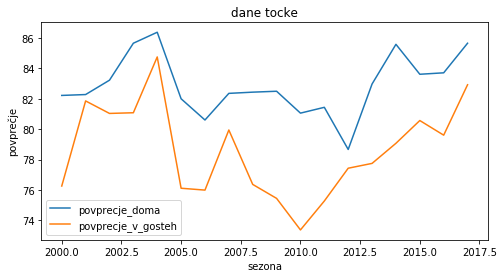

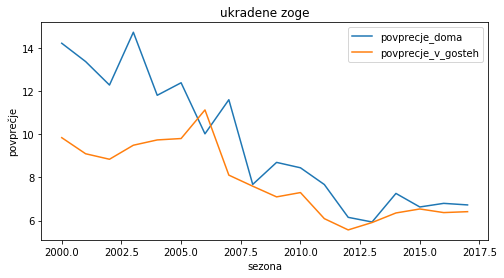

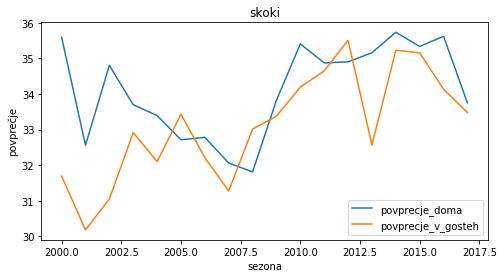

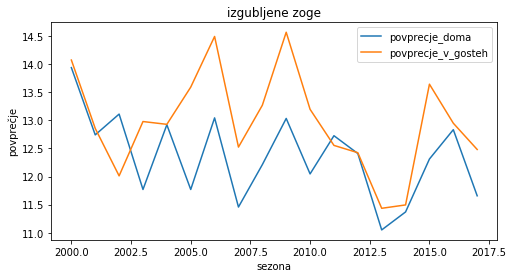

In [147]:
podatki = list(dict.fromkeys(stat['vrsta_podatka']))
for podatek in podatki:
    podatki = stat[stat.vrsta_podatka==podatek][['sezona', 'povprecje_doma', 
                                                   'povprecje_v_gosteh']].groupby('sezona').mean()
    podatki.plot(title= '{}'.format(podatek), figsize=[8,4]).set(ylabel='povprečje')

#### Podaje 
Vidimo da se povprečno število podaj iz sezone v sezono veča, kar pomeni da uspešne ekipe igrajo vedno bolj kolektivno.
#### Točke
Vidimo da povprečno število danih točk niha skozi leta. Lahko pa povemo da jih kar pracej manj dajo v gosteh, kar je logično.
#### Osebne napake
Od ustanovitve evrolige je povprečno število osebnih napak padalo, kar pomeni da se je igrala manj groba košarka. V zadnjih letih pa je zopet porast osebnih napak, vendar tega ne bi pripisal grobejši košarki, vendar dejstvu da se pravila konstantno spreminjajo in imajo s tem igralci ogromno preglavic.
#### Ukradene žoge in prejete točke
Vidimo da povprečje ukradenih točk pada in število prejetih točk narašča, kar pomeni da igrajo ekipe vedno slabšo obrambo.  
Za ostale statistične prvine ne morem povedati ničesar pametnega.